In [147]:
import tensorflow as tf
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from time import time


In [148]:
tf.test.gpu_device_name()

''

In [149]:
# получение пути директории с данными из файла с конфигами
with open("../config.json") as file:
    config = json.load(file)
breast_cancer_data_path = config['breast_cancer_data_path']

# Breast cancer data
 https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download&select=data.csv

In [150]:
breast_cancer_dataset = dataset = pd.read_csv(r'../datasets/breast_cancer/breast_cancer.csv', sep=",", header=0)
breast_cancer_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [151]:
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [152]:
breast_cancer_dataset.drop('Unnamed: 32', axis=1, inplace=True)

In [153]:
breast_cancer_dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


столбец diagnosis:<br>
    benign - доброкачественный -> заменим на 0<br>
    malignant - злокачественный -> заменим на 1<br>
     

In [154]:
breast_cancer_dataset['diagnosis'] = LabelEncoder().fit_transform(breast_cancer_dataset['diagnosis'])
breast_cancer_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [155]:
breast_cancer_dataset['diagnosis'].unique()

array([1, 0])

разобъём данные на тренировочную и тестовую выборки

In [156]:
breast_cancer_dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [157]:
features = breast_cancer_dataset[breast_cancer_dataset.columns[~breast_cancer_dataset.columns.isin(['diagnosis','id'])]] # все столбцы кроме целевого и id пойдут в признаки
targets = breast_cancer_dataset['diagnosis']

In [158]:
features.head()
# len(features.columns)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [159]:
targets.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [160]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, random_state=0)

In [161]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
293,11.850,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.060,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.980,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.590,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.500,26.10,98.91,739.1,0.10500,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.690,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.180,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,0.1550,0.04996,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.027100,0.014060,0.1506,0.06959,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,0.06447,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


создадим структуру нейронной сети

In [180]:
classifier = Sequential() # Инициализация НС
classifier.add(Input(shape=(30,)))
# classifier.add(Dense(units = 16, activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 16, activation = 'relu'))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [181]:
%%time
# epochs_number = 20 + номер вашей бригады*5
epochs_number = 20 + 1*5
t1 = time()
history = classifier.fit(X_train, y_train, batch_size = 10,validation_split=0.1, epochs = epochs_number, verbose = 1)
t2 = time()
print("Время выполнения: {:.2f}s".format(t2 - t1))

Epoch 1/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7419 - loss: 0.6012 - val_accuracy: 0.7674 - val_loss: 0.5769
Epoch 2/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8375 - loss: 0.5310 - val_accuracy: 0.7209 - val_loss: 0.5975
Epoch 3/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8348 - loss: 0.5253 - val_accuracy: 0.7674 - val_loss: 0.5836
Epoch 4/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8448 - loss: 0.4953 - val_accuracy: 0.7907 - val_loss: 0.5684
Epoch 5/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8548 - loss: 0.4842 - val_accuracy: 0.8140 - val_loss: 0.5398
Epoch 6/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8899 - loss: 0.4833 - val_accuracy: 0.8372 - val_loss: 0.5373
Epoch 7/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9235 - loss: 0.4265 - val_accuracy: 0.7907 - val_loss: 0.5274
Epoch 8/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8619 - loss: 0.4879 - val_accuracy: 0.8140 - val_loss:

In [182]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [183]:
y_pred = classifier.predict(X_test) # подаём на вход обученной НС тестовый набор данных
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [184]:
y_test_diagnosis = y_test.reset_index()['diagnosis']
y_test_diagnosis

0      1
1      0
2      0
3      0
4      0
      ..
138    1
139    0
140    0
141    0
142    1
Name: diagnosis, Length: 143, dtype: int64

In [185]:
total = 0
correct = 0
wrong = 0
for i in range(len(y_pred)):
    total=total+1
    if(y_test_diagnosis[i] == y_pred[i]):
        correct=correct+1
    else:
        wrong=wrong+1
print("Total " + str(total))
print("Correct " + str(correct))
print("Wrong " + str(wrong))

Total 143
Correct 130
Wrong 13


              precision    recall  f1-score   support

           0       0.90      0.97      0.93        90
           1       0.93      0.81      0.87        53

    accuracy                           0.91       143
   macro avg       0.92      0.89      0.90       143
weighted avg       0.91      0.91      0.91       143



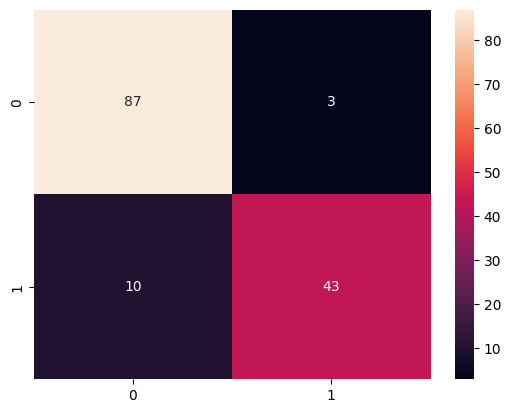

In [186]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
# plt.savefig('confusion_svm.png')
_ = plt.show()

In [187]:
history.history

{'accuracy': [0.7989556193351746,
  0.8407310843467712,
  0.8485639691352844,
  0.8616188168525696,
  0.8668407201766968,
  0.8798955678939819,
  0.9033942818641663,
  0.8851174712181091,
  0.9033942818641663,
  0.8929504156112671,
  0.8877284526824951,
  0.9033942818641663,
  0.8929504156112671,
  0.9112271666526794,
  0.8929504156112671,
  0.9086161851882935,
  0.8955613374710083,
  0.9060052037239075,
  0.9007833003997803,
  0.9060052037239075,
  0.9112271666526794,
  0.9007833003997803,
  0.9164490699768066,
  0.8981723189353943,
  0.9138381481170654],
 'loss': [0.5642802715301514,
  0.5300314426422119,
  0.5189898610115051,
  0.5142669677734375,
  0.4990885257720947,
  0.4862585961818695,
  0.4625530242919922,
  0.47368359565734863,
  0.44793960452079773,
  0.4457686245441437,
  0.4390743374824524,
  0.4291401505470276,
  0.4361325800418854,
  0.409792959690094,
  0.42189937829971313,
  0.4013729393482208,
  0.40535932779312134,
  0.3885287344455719,
  0.37862831354141235,
  0.372

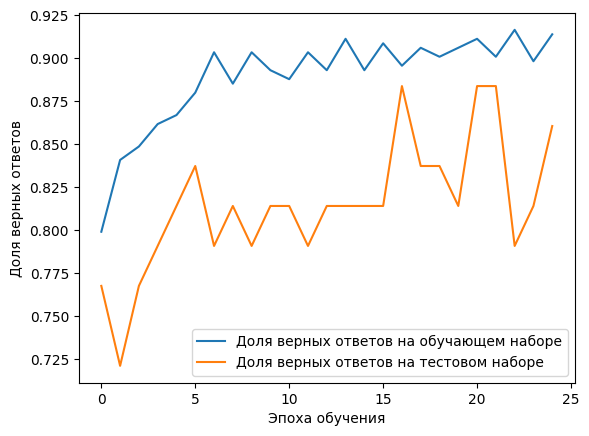

In [188]:
plt.close()
plt.plot(history.history['accuracy'], label="Доля верных ответов на обучающем наборе")
plt.plot(history.history['val_accuracy'], label="Доля верных ответов на тестовом наборе")
plt.xlabel("Эпоха обучения")
plt.ylabel("Доля верных ответов")
plt.legend()
plt.show()

Создадим и обучим (фиксируя затрачиваемое время) ещё нейросетевую
моделей:<br>
• с иным количеством слоёв, нейронов в них и функциями активации<br>
• с различным количеством эпох обучения, <br>
• с иным методом оптимизации и/или функцией потерь <br>

In [249]:
# 1 
classifier = Sequential() # Инициализация НС
classifier.add(Input(shape=(30,)))
# classifier.add(Dense(units = 16, activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 30, activation = 'relu'))
classifier.add(Dense(units = 30, activation = 'relu'))
classifier.add(Dense(units = 16, activation = 'log_softmax'))
classifier.add(Dense(units = 16, activation = 'relu'))
classifier.add(Dense(units = 8, activation = 'leaky_relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [250]:
%%time
# epochs_number = 20 + номер вашей бригады*5
t1 = time()
history = classifier.fit(X_train, y_train, batch_size = 25,validation_split=0.1, epochs = 100, verbose = 1)
t2 = time()
print("Время выполнения: {:.2f}s".format(t2 - t1))

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4537 - loss: 13.4150 - val_accuracy: 0.6977 - val_loss: 0.8775
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7768 - loss: 1.0082 - val_accuracy: 0.8605 - val_loss: 0.5142
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8928 - loss: 0.3787 - val_accuracy: 0.9070 - val_loss: 0.4473
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8867 - loss: 0.6988 - val_accuracy: 0.8605 - val_loss: 0.3241
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9088 - loss: 0.3172 - val_accuracy: 0.8837 - val_loss: 0.3550
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9137 - loss: 0.2319 - val_accuracy: 0.8837 - val_loss: 0.2844
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9267 - loss: 0.2659 - val_accuracy: 0.8605 - val_loss: 0.3331
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9302 - loss: 0.1959 - val_accuracy: 0.8605 - 

In [251]:
y_pred = classifier.predict(X_test) # подаём на вход обученной НС тестовый набор данных
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


              precision    recall  f1-score   support

           0       0.94      0.97      0.95        90
           1       0.94      0.89      0.91        53

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



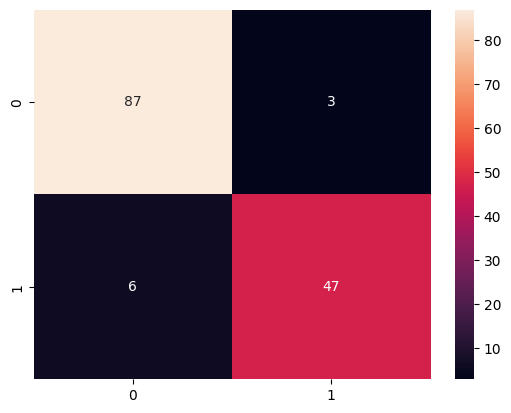

In [252]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
# plt.savefig('confusion_svm.png')
_ = plt.show()

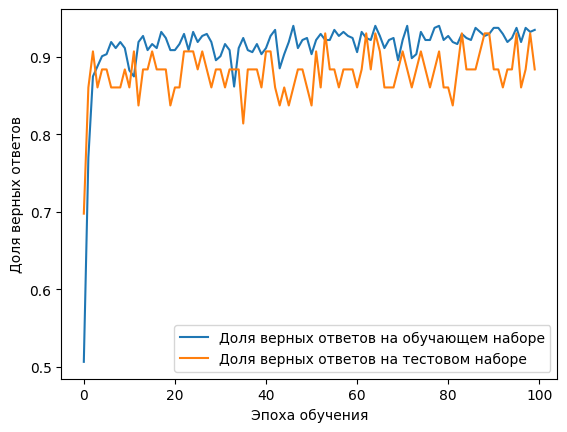

In [253]:
plt.close()
plt.plot(history.history['accuracy'], label="Доля верных ответов на обучающем наборе")
plt.plot(history.history['val_accuracy'], label="Доля верных ответов на тестовом наборе")
plt.xlabel("Эпоха обучения")
plt.ylabel("Доля верных ответов")
plt.legend()
plt.show()